In [52]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# LING229 2024 T3 Assignment One
## Sport Commentary Corpus
**Savio Concessio 300629183**<br>
The corpus I have created is a collection of sports highlight commentary transcripts. These have all been taken from youtube videos online compiling information usin a video to transcript software (https://www.youvideototext.com/) to get the full transcript as a text file for processing. <br>
(Sources + Corpus Links : https://docs.google.com/document/d/1toAw4dQ_XVXHpGXyap7DgV9RbWwORX8EvbyvusG7ATE/edit?usp=sharing)<br>
The Corpus is split into 3 sports, Football, American Football and Golf and I intend to investigate the difference in the language used between these sports, allowing me to bring contextually insight as a player/fan of these sports along with the analytical mindset.

In [53]:
# Loading Corpus in Categorically by Sport
import nltk
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader
corpus_location = '/content/drive/MyDrive/contented'
sport_corpus = CategorizedPlaintextCorpusReader(root = corpus_location, fileids = '.*', cat_pattern = '.*(...).txt')

# Basic Metrics Unfiltered
Metrics like tokens and types help characterize a corpus by quantifying its size and lexical richness. The average token and type counts reveal typical document length and vocabulary usage. Lexical diversity measures the variability in language, distinguishing simple texts from more complex ones. Together, these metrics provide basic insights into the scope, style, and complexity of the corpus.

Variables created to count the *tokens*, *types* and numbers of *texts* in the corpus for easy access when calculating these metrics.

In [54]:
total_tokens = len(sport_corpus.words())
total_types = len(set(sport_corpus.words()))
total_texts = len(sport_corpus.fileids())

### How many total tokens and types in the entire corpus?
Total tokens: Number of words (including repetitions) across the entire corpus.<br>
Total types: Number of unique words across the entire corpus.

In [55]:
print(f"Total tokens in corpus: {total_tokens}\nTotal types in corpus: {total_types}")

Total tokens in corpus: 25553
Total types in corpus: 3790


### How many total tokens and types in each text?
Tokens: Number of words (including repetitions) in each individual text.<br>
Types: Number of unique words in each individual text.

In [56]:
for text in sport_corpus.fileids():
  print(f"Total tokens in {text}: {len(sport_corpus.words(text))} Total types in {text}: {len(set(sport_corpus.words(text)))}")

Total tokens in hazard_2018_ftb.txt: 666 Total types in hazard_2018_ftb.txt: 303
Total tokens in henry_2023_nfl.txt: 2380 Total types in henry_2023_nfl.txt: 632
Total tokens in jettas_2022_nfl.txt: 3569 Total types in jettas_2022_nfl.txt: 718
Total tokens in kane_2024_ftb.txt: 1345 Total types in kane_2024_ftb.txt: 456
Total tokens in lamar_2023_nfl.txt: 3582 Total types in lamar_2023_nfl.txt: 857
Total tokens in messi_2012_ftb.txt: 748 Total types in messi_2012_ftb.txt: 252
Total tokens in minwoo_2023_pga.txt: 1407 Total types in minwoo_2023_pga.txt: 472
Total tokens in neymar_2018_ftb.txt: 1202 Total types in neymar_2018_ftb.txt: 397
Total tokens in rahm_2021_pga.txt: 5522 Total types in rahm_2021_pga.txt: 1164
Total tokens in rory_2024_pga.txt: 1376 Total types in rory_2024_pga.txt: 483
Total tokens in smitty_2020_nfl.txt: 2497 Total types in smitty_2020_nfl.txt: 610
Total tokens in tiger_2018_pga.txt: 1259 Total types in tiger_2018_pga.txt: 368


### What is the average number of types and tokens across your texts?
Average tokens: Sum of all tokens across texts divided by the number of texts.<br>
Average types: Sum of all types across texts divided by the number of texts.

In [57]:
text_number = len(sport_corpus.fileids())
print(f"Average tokens per text: {round(total_tokens/total_texts)}\nAverage types per text: {round(total_types/total_texts)}")

Average tokens per text: 2129
Average types per text: 316


# Pre-Processing Functions
While these initial values and metrics provide a basic insight, these texts are full of random variation and tokens that cloud our insight into the core 'meaning' of the texts. That is why preprocessing must be done in order to have access and process the texts.

**Preprocessing dependancies used**

In [58]:
import nltk
nltk.download(['stopwords', 'punkt_tab'])
from nltk.corpus import stopwords
nltk.download('punkt_tab')
import re
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Lexical Diversity
This function, provided in the class notebooks calculates lexical diversity relative to the sentences themselves. As mentioned, calculating it in this way avoids problems that longer texts will naturally start to repeat certain words again.

In [59]:
def average_ttr(text):

  ttr_values = []
  sentences = nltk.sent_tokenize(text)

  for sent in sentences:

    sent_ld = len(set(sent.split()))/len(sent.split())

    ttr_values.append(sent_ld)

  return sum(ttr_values)/len(ttr_values)

#### Lexical Diversity of the Texts in the Corpus
This value uses the function defined above and displays the lexical diversity of the corpus. As seen below, this value ranges. Processing this as raw texts will provide this along with the several changing factors over sport, competition and even down to the commentary crew itself.

In [60]:
total_diversity = 0
for text in sport_corpus.fileids():
  print(f"Lexical Diversity of text {text} is : {round(average_ttr(sport_corpus.raw(text)), 4)}")
  total_diversity = total_diversity + average_ttr(sport_corpus.raw(text))
print(f"Average lexical diversity of corpus: {round(total_diversity/total_texts,4)}")

Lexical Diversity of text hazard_2018_ftb.txt is : 0.5241
Lexical Diversity of text henry_2023_nfl.txt is : 0.2897
Lexical Diversity of text jettas_2022_nfl.txt is : 0.9755
Lexical Diversity of text kane_2024_ftb.txt is : 0.3697
Lexical Diversity of text lamar_2023_nfl.txt is : 0.974
Lexical Diversity of text messi_2012_ftb.txt is : 0.4161
Lexical Diversity of text minwoo_2023_pga.txt is : 0.3711
Lexical Diversity of text neymar_2018_ftb.txt is : 0.3715
Lexical Diversity of text rahm_2021_pga.txt is : 0.9819
Lexical Diversity of text rory_2024_pga.txt is : 0.3874
Lexical Diversity of text smitty_2020_nfl.txt is : 0.3838
Lexical Diversity of text tiger_2018_pga.txt is : 0.5982
Average lexical diversity of corpus: 0.5536


Taking a further look into the diversity by sport below it shows that the texts in the American Football category is the most diverse while in Golf they are the least diverse. This aligns with what I would think and will be discussed later in my conclusions.

In [61]:
corpus_diversity = dict()
for category in sport_corpus.categories():
  total_diversity = 0
  for text in sport_corpus.fileids(category):
    total_diversity = total_diversity + average_ttr(sport_corpus.raw(text))
  corpus_diversity[category] = total_diversity/len(sport_corpus.fileids(category))

for key, value in corpus_diversity.items():
  print(f"Lexical Diversity of {key} is : {round(value, 4)}")

Lexical Diversity of ftb is : 0.4203
Lexical Diversity of nfl is : 0.6557
Lexical Diversity of pga is : 0.5847


# Frequency Distributions
Frequency distributions of types and tokens help us understand the structure and usage patterns within a corpus. A type frequency distribution reveals how often unique words occur, while a token frequency distribution provides insight into the overall repetition of words. Together, they highlight both the breadth and depth of vocabulary use. High token frequency often correlates with the presence of stopwords, which dominate the language but add little thematic value. Conversely, the type distribution helps pinpoint the richness of unique vocabulary and identifies patterns that characterize the text's style or subject matter. These distributions are essential for linguistic analysis, sentiment extraction, or topic modeling, offering insights into how the corpus communicates its core ideas.

In [62]:
from nltk import FreqDist

In [63]:
def get_most_frequent_dict():
  word_map = dict()
  for text in sport_corpus.fileids():
    for word in sport_corpus.words(text):
      word = word.lower()
      if word in word_map:
        word_map[word] = word_map[word] + 1
      else:
        word_map[word] = 1
  return word_map

def get_freq_dist() :
  all_words = []
  for fileid in sport_corpus.fileids():
      all_words.extend(sport_corpus.words(fileid))
  all_words = [word.lower() for word in all_words]
  freq_dist = FreqDist(all_words)

  return freq_dist

### What are the most frequent word(s) in your corpus?
The most frequent words in a corpus often reflect its dominant themes or linguistic norms. Commonly, stopwords such as "the," "this," and "and" seen beloew will top the list unless removed during preprocessing. However, frequent content-specific words reveal much about the corpus's focus. These high-frequency words are useful for identifying recurring topics and priorities within the texts.

In [64]:
print(f"Most frequent word in corpus: {get_freq_dist().most_common(8)}") # Obviously not useful immediately due to no pre-processing/cleaning (discussed later)

Most frequent word in corpus: [('the', 1208), ('.', 1168), ("'", 673), ('to', 663), ('and', 621), ('it', 608), ('a', 536), ('s', 461)]


### What are the most frequent words in the individual texts?
Looking at the most frequent words in individual texts offers a more granular perspective. While the corpus may have overarching dominant themes, individual texts often introduce unique frequent words related to their specific subtopics and contexts. Analyzing these differences across texts within a corpus can illuminate variations in style, focus, or purpose, helping to draw distinctions between sections or chapters in larger collections.

In [65]:
for text in sport_corpus.fileids():
  print(f"Most frequent word in text {text}: {nltk.FreqDist(sport_corpus.words(text)).most_common(3)}") # Further exhibiting problem of no pre-processing/cleaning

Most frequent word in text hazard_2018_ftb.txt: [("'", 26), ('the', 21), ('to', 18)]
Most frequent word in text henry_2023_nfl.txt: [('the', 148), ('and', 96), ('to', 90)]
Most frequent word in text jettas_2022_nfl.txt: [('.', 336), ('THE', 181), (',', 141)]
Most frequent word in text kane_2024_ftb.txt: [('Kane', 71), ('and', 52), ('the', 48)]
Most frequent word in text lamar_2023_nfl.txt: [('.', 293), ('THE', 187), (',', 111)]
Most frequent word in text messi_2012_ftb.txt: [('Messi', 58), ("'", 39), ('it', 35)]
Most frequent word in text minwoo_2023_pga.txt: [('the', 72), ("'", 48), ('a', 39)]
Most frequent word in text neymar_2018_ftb.txt: [('it', 44), ("'", 36), ('a', 35)]
Most frequent word in text rahm_2021_pga.txt: [('.', 525), ('the', 229), (',', 146)]
Most frequent word in text rory_2024_pga.txt: [('the', 66), ('it', 53), ("'", 47)]
Most frequent word in text smitty_2020_nfl.txt: [('the', 126), ('and', 88), ('to', 82)]
Most frequent word in text tiger_2018_pga.txt: [('the', 58)

### What are the very infrequent words in your corpus/texts?
Infrequent words, those appearing rarely, provide critical insights into the nuance of the text. These words are often proper nouns, specialized jargon, or rare descriptive terms that add depth and specificity to the content.Examining such rare words can identify unique or surprising elements in a corpus, which may help differentiate it from others. As seen by the output from the raw text, a large number of the corpus are hapaxes/ infrequent and this will be further investigated.

In [66]:
for text in sport_corpus.fileids():
  print(f"Very infrequent words in text {text} out of {len(nltk.FreqDist(sport_corpus.words(text)).hapaxes())}: {nltk.FreqDist(sport_corpus.words(text)).hapaxes()[:10]} ") # Initially each text showed many so narrowed down to display 10

Very infrequent words in text hazard_2018_ftb.txt out of 206: ['martinez', 'sprung', 'surprise', 'always', 'evening', 'andres', 'cunha', 'ratonga', 'dembele', '79th'] 
Very infrequent words in text henry_2023_nfl.txt out of 370: ['step', '30', '66', 'Chris', 'Hub', 'pancakes', 'ground', 'seals', 'Edge', 'Pancake'] 
Very infrequent words in text jettas_2022_nfl.txt out of 385: ['DESIGNED', 'SITUATION', 'MENTIONED', 'PRE', 'SEEN', 'ENTIRE', 'BRING', 'TOKEN', 'JET', 'DEFENDER'] 
Very infrequent words in text kane_2024_ftb.txt out of 298: ['advertised', 'extensively', 'classic', 'England', 'captain', 'position', 'Munich', 'point', 'half', 'change'] 
Very infrequent words in text lamar_2023_nfl.txt out of 512: ['HOBBLED', 'REST', 'PLENTY', 'SHOT', 'SAYING', 'YET', 'KIDDING', 'ARM', 'INK', 'ANDREW'] 
Very infrequent words in text messi_2012_ftb.txt out of 163: ['minute', 'three', 'added', 'gone', '40', 'Lei', 'rolls', 'Adriano', 'header', 'carrying'] 
Very infrequent words in text minwoo_202

# Preprocessing Evaluation
Below I evaluate the affects of pre-processing the texts comparing various metrics relevant to the richness and uniqueness of the text.

In [67]:
import matplotlib.pyplot as plt # visualisation library

#### General Freq. Dist.
This plot shows the general distribution of the whole corpus. This adheres to Zipf's law, which states that the most frequent word occurs at least twice as much as the second most frequent word, and this this relationship persists. Without pre-processing it is clear there is a large amount of words that occur once and are likely to not be providing much of a relational contribtuion to the corpus.

<Axes: xlabel='Samples', ylabel='Counts'>

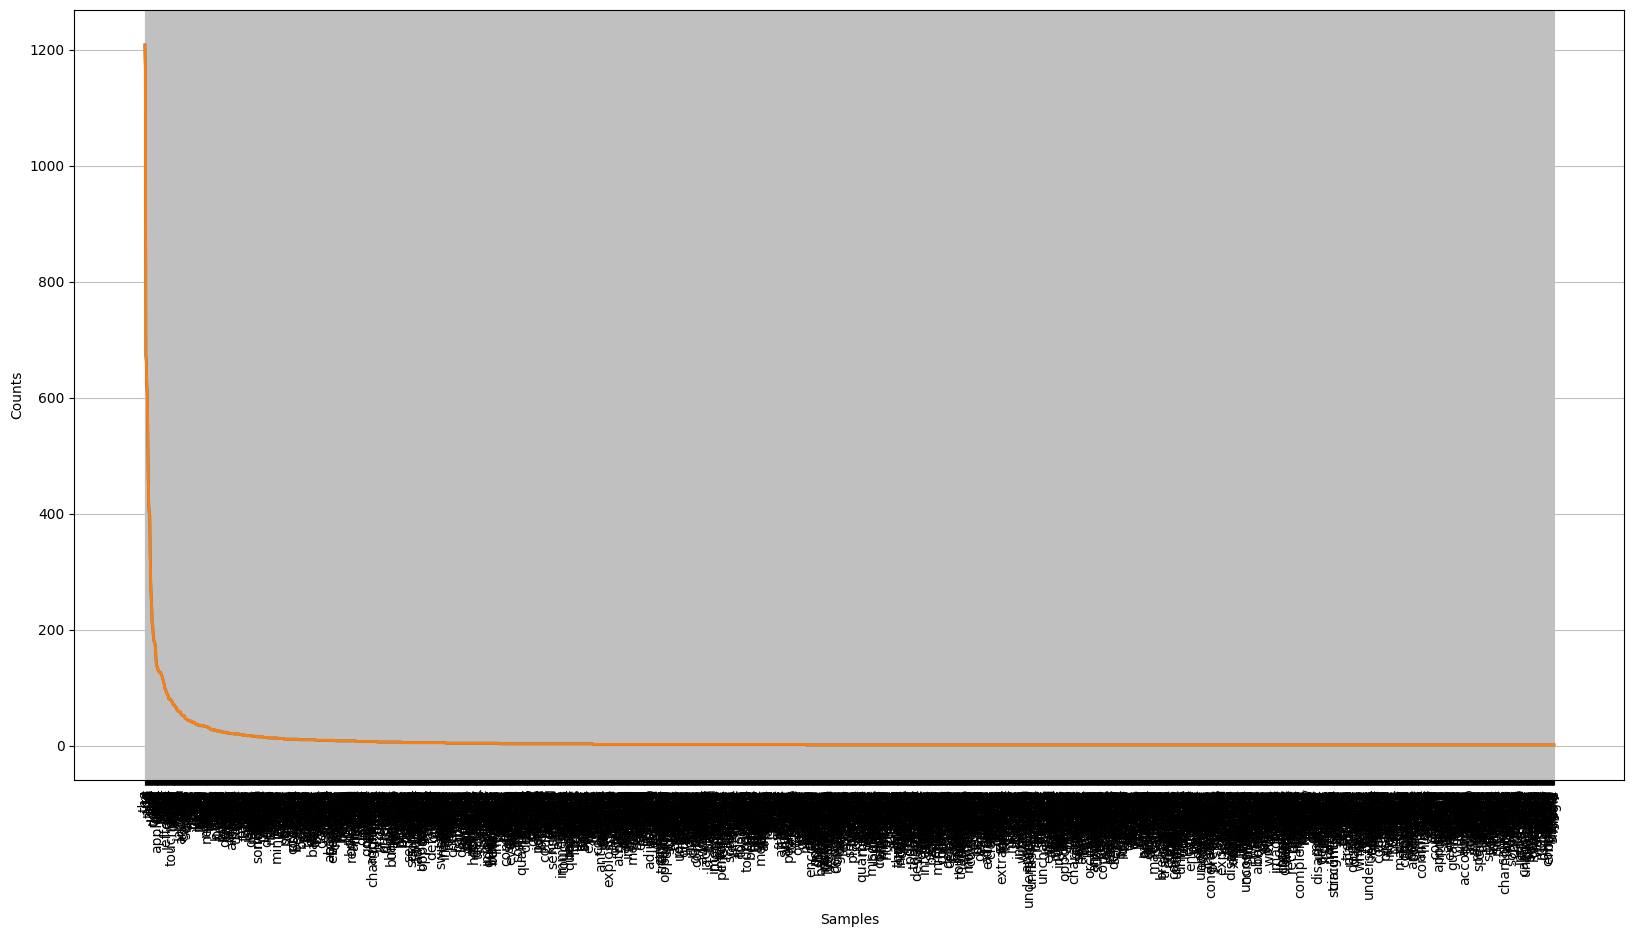

In [68]:
# Obviously not useful graph showing vast range of words in plot
plt.figure(figsize = (20, 10))

get_freq_dist().plot()
get_freq_dist().plot()

#### Fitering Function
The `clean_text` and `clean_sent` functions provide a comprehensive processing of the text as discussed throughout the class. This includes:

*   Moving to lowercase
*   Stripping extra whitespace
*   Removing stop words
*   Removing punctiuation
*   Removing extra characters observed in corpus

This provides a texts more representative of the actual texts and allows for improved analysis as displayed later.



In [23]:
def clean_sent(sentence):
  sentence = sentence.strip()
  output = ''
  for word in sentence.split():
    found = False
    for stop_word in stopwords.words('english'):
      if stop_word == word:
        found = True
        break
    if found:
      continue
    if '>' in word or '[' in word or ']' in word or word.isnumeric() :
      continue
    output = output + ' ' + word
  output = re.sub(r'[^\w\s]', '', output)
  return output

def clean_text(text):
  text = text.lower()
  output_text = ''
  for t in nltk.sent_tokenize(text):
    output_text = output_text + ' ' + (clean_sent(t))
  return output_text

#### Plotting Resultant Frequencies
The resultant plot shows a more gradual relative fall of from the most frequent word. Reasons for this can include the combination of words capatilised or containing punctuations and the removal of the punctuation and helper words/tokens like '[' within

In [70]:
# Getting all the words of the corupus after cleaning - Full cleaning
all_words = ''
for fileid in sport_corpus.fileids():
  for word in clean_text(sport_corpus.raw(fileid)).split():
    all_words = all_words + ' ' + word

full_tokenised = all_words.split()
full_freq_dist = FreqDist(full_tokenised)

<Axes: xlabel='Samples', ylabel='Counts'>

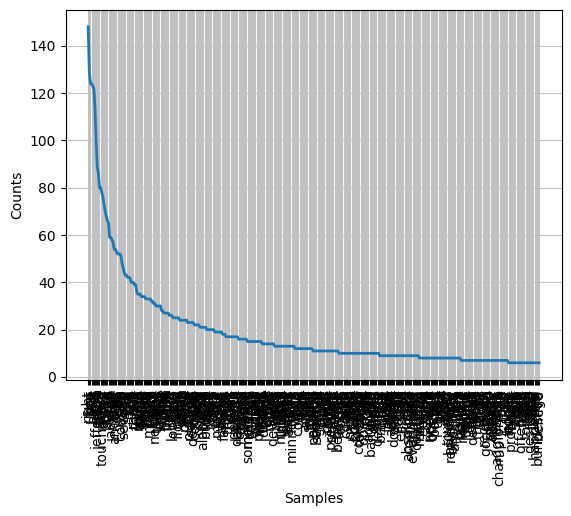

In [25]:
full_freq_dist.plot(400)

In [26]:
import matplotlib.pyplot as plt

#### Analysing Change in Lexical Complexity
This function below allows for the contrasting of the lexical complexity. This allows for relative comparisons of the texts and the change in this values provides insights into the raw nature of the corpuses.

In [27]:
def analyse_clean(fileid, name):
    comparison_lex = calculate_diff_ttr(fileid)
    categories = ["Raw", "Processed"]
    plt.bar(categories, comparison_lex)
    plt.title(f"Lexical Diversity of {name}")
    plt.xlabel("Text")
    plt.ylabel("Lexical Diversity")
    return comparison_lex


These functions call do the calculation of the relative lexical complexity and return them as lists for analysis/plotting.

In [28]:
def calculate_diff_ttr(fileid):
  return [average_ttr(sport_corpus.raw(fileid)), average_ttr(clean_text(sport_corpus.raw(fileid)))]
def calculate_diff_ttr_with_freq(fileid):
  return [average_ttr(sport_corpus.raw(fileid)), average_ttr(clean_text_min_freq(sport_corpus.raw(fileid)))]

The function below provides the plot to visualise the change relative to the pre-processing. However, there seems to be a lack of a pattern, which requires further investigation and analysis to understand. <br><br>
Initially, I thought that the categories themselves would have a pattern within them, especially the Golf and NFL ones which were made by mainly the same central source between them and when looking at a glance seem to need the least pre-processing. However, these still had unpredictable variation within them. <br>
#### Understanding the Increade and Decrease in Lexical Complexity

An increase in complexity after processing raw text typically indicates a greater diversity of linguistic structures or an expanded vocabulary range in the corrected text. This can occur if errors in capitalization or punctuation previously fragmented sentences, limiting the identification of phrases and syntactic patterns. When such errors are corrected through processing, the text can reveal more nuanced grammar and richer lexical variation, leading to the higher measure of linguistic complexity.

Conversely, a decrease in complexity suggests that correcting the text reduced variability or minimized redundant or inconsistent usage. This can happen when capitalized errors or erratic punctuation which artificially inflated the  uniqueness of words/tokens in the text.




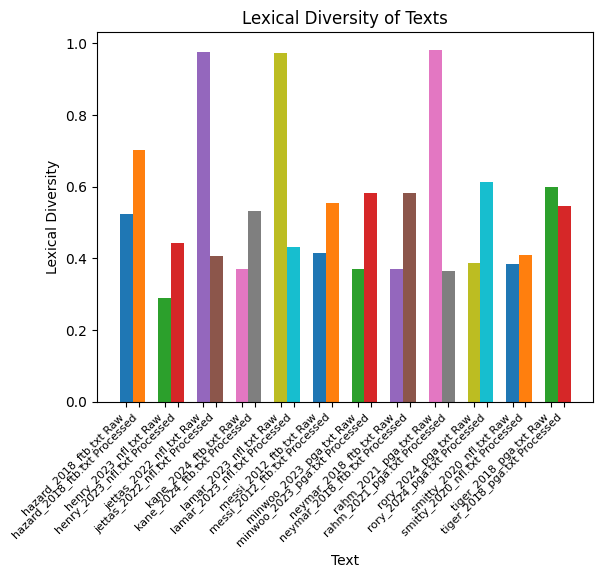

In [29]:
categories = ["Raw", "Processed"]
fig, ax = plt.subplots()
i = 20
labels = []
x_positions = []
for text in sport_corpus.fileids():
  comparison_lex = calculate_diff_ttr(text)
  plt.bar(i - 10, height = comparison_lex[0], width = 10, label= text+ ' ' +categories[0])
  plt.bar(i, height = comparison_lex[1], width = 10, label= text+ ' ' +categories[1])
  labels.append(text + ' ' +categories[0])
  labels.append(text + ' ' +categories[1])
  x_positions.append(i-10)
  x_positions.append(i)
  i = i + 30
plt.title("Lexical Diversity of Texts")
plt.xlabel("Text")
plt.ylabel("Lexical Diversity")
ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
plt.show()

# Removing Words by Frequency

This function cleans the text further by removing words that only occur over 3 times. This function builds on the previous analysis and allows for greater insight into the texts and the previous attempt lacked a prevasive pattern throughout.

In [30]:
# Removing words that occur 3 or less times
def clean_text_min_freq(text, min_frequency=2):
    stop_words = set(stopwords.words('english'))
    words = clean_text(text).split()
    freq_dist = FreqDist(words)
    cleaned_words = [word for word in words if word not in stop_words and freq_dist[word] >= min_frequency]
    return " ".join(cleaned_words)

#### Understanding Change in Complexity After Removing Infrequencies
As expected, there is a uniform change in the complexity in all the texts. As discussed before, this shows a decrease in the inconsistencies and provides a clearer insight into the core of the text itself, as words used infrequently, while providing depth and intricicies, contribute less to the centrality of the text and corpus.

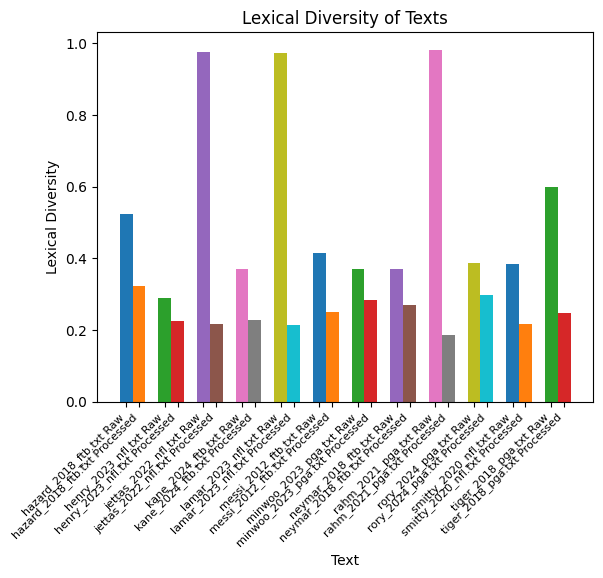

In [31]:
categories = ["Raw", "Processed"]
fig, ax = plt.subplots()
i = 20
labels = []
x_positions = []
for text in sport_corpus.fileids():
  comparison_lex = calculate_diff_ttr_with_freq(text)
  plt.bar(i - 10, height = comparison_lex[0], width = 10, label= text+ ' ' +categories[0])
  plt.bar(i, height = comparison_lex[1], width = 10, label= text+ ' ' +categories[1])
  labels.append(text + ' ' +categories[0])
  labels.append(text + ' ' +categories[1])
  x_positions.append(i-10)
  x_positions.append(i)
  i = i + 30
#plt.legend()
plt.title("Lexical Diversity of Texts")
plt.xlabel("Text")
plt.ylabel("Lexical Diversity")
ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
plt.show()


# Sentiment Analysis
My first analysis point was to analyse the relative sentiment of the texts. While all of these texts are highlights and are meant to provide positive plays, I want to analyse the relative sentiment per category. The reason for choosing different sports was to investigate the nature of each of these and to try find an underlying pattern. The sports chosen have a drastic change in intensity and pace, both in play and in viewership. Golf is far less intensive and can be described as a pleasant viewing experience, on the other hand, Football and American Football are action-packed and athletic sports, where the viewing experience is far more engaging. Therefore, analysing the sentiment would allow us to understand the correlation of the precieved sentiment viewing experience and corresponding sentiment of the corpus itself.

In [32]:
# Resources for sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

As observed below, I added some specific words to the sports that at face-value have no sentiment, but have a large negative, especially for the contrast done later.

In [33]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.lexicon.update({
    "intercepted":-1.0,
    "interception":-1.0,
    "interceptions":-1.0,
    "intercept": -1.0,
    "fumble": -1.0,
    "fumbled": -1.0
    })

def get_sentiment_scores(text):
  sentiment_scores = sia.polarity_scores(text)
  return sentiment_scores

def determine_sentiment(sentiment_scores):
    if sentiment_scores['compound'] >= 0.05:
        return "Positive sentiment: " + str(sentiment_scores['compound'])
    elif sentiment_scores['compound'] <= -0.05:
        return "Negative sentiment: " + str(sentiment_scores['compound'])
    else:
        return "Neutral sentiment: " + str(sentiment_scores['compound'])

In [34]:
for text in sport_corpus.fileids():
  print(f"Sentiment of text {text}: {determine_sentiment(get_sentiment_scores(clean_text(sport_corpus.raw(text))))}")

Sentiment of text hazard_2018_ftb.txt: Positive sentiment: 0.9967
Sentiment of text henry_2023_nfl.txt: Positive sentiment: 0.9972
Sentiment of text jettas_2022_nfl.txt: Positive sentiment: 0.9993
Sentiment of text kane_2024_ftb.txt: Positive sentiment: 0.9985
Sentiment of text lamar_2023_nfl.txt: Positive sentiment: 0.9997
Sentiment of text messi_2012_ftb.txt: Positive sentiment: 0.9905
Sentiment of text minwoo_2023_pga.txt: Positive sentiment: 0.9997
Sentiment of text neymar_2018_ftb.txt: Positive sentiment: 0.9985
Sentiment of text rahm_2021_pga.txt: Positive sentiment: 1.0
Sentiment of text rory_2024_pga.txt: Positive sentiment: 0.9991
Sentiment of text smitty_2020_nfl.txt: Positive sentiment: 0.9983
Sentiment of text tiger_2018_pga.txt: Positive sentiment: 0.9987


### Understanding the Output of the Analysis
Despite my hypothesis, the output showed overtly positive output. Furthermore, the relative positivity of all is so high irrespective of the sport. Reflecting on this shows that it is likely due to both the lack of negativity in highlights and the general nature of commentary. As highlights, there is likely to be absolutely no negativity. Especially in an individual sport like golf, in a team sport like Football/American Football, a positive play for a player/team can be caused by a negative play by their opposite, however, even this did not seem to affect this. Along with this, the general nature of commentary is the descriptive. This leads to a large portion of the tokens simple being neutral, giving a larger neutral generality along with the large precence of positivity will lead to a large positive score.

### Investigating Comparison With 'Lowlights'
To further solidify the findings of the sentiment, the relative sentiment of negative play compilations were analysed. This showed the output of a positive sentiment, as expected. As previously discussed, the nature of commentary simply provides a lack of negativeness. The negative texts show a relative jump down however they are still strongly positive. Another reason for this could be the sport itself. I had to use NFL as my example as there is a lack of 'centralised' negative content (discussed later). These negative plays themselves are positive for the other team. This works to balance the negatives of the text and move the text towards positivity as seen.

In [38]:
bad_text_9 = clean_text(open('/content/drive/MyDrive/contented2/week9_bad_plays_nfl.txt').read())
bad_text_12 = clean_text(open('/content/drive/MyDrive/contented2/week12_bad_plays_nfl.txt').read())
# Displaying lack of change despite strong negatives in the sport
print("Sentiment for word 'FUMBLE': ", sia.lexicon['fumble'])
print("Sentiment for word 'INTERCEPTION': ", sia.lexicon['interception'])
print(f"Sentiment of bad plays week 9: {determine_sentiment(get_sentiment_scores(bad_text_9))} & week 12 {determine_sentiment(get_sentiment_scores(bad_text_12))}")

Sentiment for word 'FUMBLE':  -1.0
Sentiment for word 'INTERCEPTION':  -1.0
Sentiment of bad plays week 9: Positive sentiment: 0.9763 & week 12 Positive sentiment: 0.9977


# Investigating use of most common word
The most common word used throughout the texts was 'right'. I decided to investigate the use of this word and its relavive use through `concordance`.

In [42]:
from nltk.text import Text

These functions display the relative use of the most common word allowing for examples of its use. The text iself is kept in place without processing to display its relative context.

In [40]:
def get_words_by_category(category):
    # Collect raw text from all files into a list
    raw_texts = [sport_corpus.raw(text) for text in sport_corpus.fileids(category)]
    # Join the list of strings into one large string
    return " ".join(raw_texts)

def print_concordance_by_category(category, word):
  for text in sport_corpus.fileids(category):
    print(f"Concordance for {text}: ")
    this_text = Text((sport_corpus.raw(text)).lower().split())
    print(this_text.concordance(word, lines=3))


In [43]:
#Amrican Football
print_concordance_by_category('nfl', 'right')

Concordance for henry_2023_nfl.txt: 
Displaying 3 of 20 matches:
all the way down to the 30 watch the right side of your screen 66 chris hub pan
chdown well this is called sing gate right here when you come up the field you 
 the field too far look at the level right there and then king henry little sti
None
Concordance for jettas_2022_nfl.txt: 
Displaying 3 of 8 matches:
an box because this is a ten-man box right now. >> chris: hockenson is in motio
is all about -- we talk about trust. right here. here's jefferson. this is cove
s from the pocket, floating one, and right underneath is justin jefferson on th
None
Concordance for lamar_2023_nfl.txt: 
Displaying 3 of 11 matches:
e. >> charles: morgan moses, 78, the right tackle come around. mark andrews, 89
t's how it is called on most >> ian: right now, the ravens are back in their ow
 first down baltimore gain of 32 and right on cue that's exactly what they need
None
Concordance for smitty_2020_nfl.txt: 
Displaying 3 of 8 matches:
atch 

In [84]:
# Golf
print_concordance_by_category('pga', 'right')

Concordance for minwoo_2023_pga.txt: 
Displaying 3 of 5 matches:
d a dip at it screaming for down the right hand side that's where all the spect
er what he did here yesterday it way right it's right again starting it's not h
did here yesterday it way right it's right again starting it's not hooking that
None
Concordance for rahm_2021_pga.txt: 
Displaying 3 of 45 matches:
aying this thing way back behind his right foot. shopping, just get it to the t
 just get it to the top of the slope right about there. see if it'll release to
t put a little used until this year. right in behind the hole and decent chance
None
Concordance for rory_2024_pga.txt: 
Displaying 3 of 9 matches:
nce it's absolutely miles down there right side pin on the left needs it to thi
's a feely one that was all sorts of right fer rory and he's to 14 underpar now
ed move across the hole from left to right we flew this three-w 300 yards off t
None
Concordance for tiger_2018_pga.txt: 
Displaying 3 of 14 matches:
e [appla

In [45]:
# Football
print_concordance_by_category('ftb', 'right')

Concordance for hazard_2018_ftb.txt: 
Displaying 1 of 1 matches:
an here goes as a brilliant man he's right he was fouled it should have been pu
None
Concordance for kane_2024_ftb.txt: 
Displaying 3 of 4 matches:
 head is a simple one for harry kane right place right time harry kane strikes 
imple one for harry kane right place right time harry kane strikes again usala 
l that we're watching and witnessing right now catch your breath time at the r 
None
Concordance for messi_2012_ftb.txt: 
Displaying 1 of 1 matches:
barcelona back in front how with his right foot ball falls to messi messi runs 
None
Concordance for neymar_2018_ftb.txt: 
Displaying 2 of 2 matches:
ost not quite but it was a nears the right place then you're merely trying to r
oment surely willian did produce one right on the money this [applause] can ney
None


In [46]:
# analysing nfl concordance
nfl_words = Text(get_words_by_category('nfl').lower().split())
#print(nfl_words.concordance('right', lines=3))
print("Words used in context of \'right\'")
nfl_words.similar('right')

Words used in context of 'right'
field left middle spears the in outside first of edge is club look
second line come block near secondary called


In [47]:
# analysing football concordance
football_words = Text(get_words_by_category('ftb').lower().split())
#print(nfl_words.concordance('right', lines=3))
print("Words used in context of \'right\'")
football_words.similar('right')

Words used in context of 'right'
wrong again


In [104]:
# analysing golf concordance
golf_words = Text(get_words_by_category('pga').lower().split())
#print(nfl_words.concordance('right', lines=3))
print("Words used in context of \'right\'")
golf_words.similar('right')

Words used in context of 'right'
one left get in good he short green now up fairway bunker very so
dives way nothing eagle thank top


#### Understanding the Outputs of the Word's Usage
The output of the usage and the similiar contexts provide insights into the use of the specific word. Looking at the concordance (further than the displayed outputs) showed a large variance in its use. Simply because 'right' can be used in several contexts as a direction, relative location, boolean and quantively. This variance is seen in the large amount of words that could be placed in the similiar context. This point is strengthened in the wide range of use that spans the sports aswell.

# Conclusion
After this initial analysis of the text it is clear to see a general pattern within the corpus. The nature of the corpus is rather varied. While a traditional text has its own variation from text to text, the nature of sports itself provides anothe dimension of uniquness to every play. This is shown in the the nature of the types and tokens within the corpus. Both raw and after processing shows a wide vocabulary present within the language of the text. Each plays allows for the new exploration of the sport and that stems directly into the calling of the game, where unique perspectives, knowlege and experience add an extra layer of depth to the language of the sport. While iconic calls like Mike Breen's "Bang" are synonymous with their sports, at any specific instane and any part of a play the outcome of the commentary is going to provide a new layer to the language. <br>
This stems into the problem with the frequency distribution i faced. The ywere not that helpful in this context. As explained, the vast internal scope of the corpus despite being in a narrow scope in terms of categories left the distributions themselves varied. The insight gained was more in confirmation of this idea, where the distributions show the range of the language within the corpus.<br>
Something that did match my expectation was the lexical diversity of the relative categories. With Golf being the least diverse, it aligned with my thinking. WIthin a golf text there is a general idea that they are all playing a limited possibility of shots and scenarios than the other two sports. This matches the intuiative way of approaching it. Simply a sport with 22 people provides far more of a range of possibilities, especially when in Football and American Football multiple people have to be involved in a play, whereas in golf, only one person is. <br>
Looking at my further investigation on sentiment, I gained insights on the nature of the text and the fact that despite the game(s) are about the brilliance and positives, especially during highlights, the text does not output this through the sentiment measure when evaluating numerically. I still am yet to understand and would like to investigate the differnce is the percieved human evaluation and computation representation of sentiment. Furthermore, I want to investigate the combination of sentiment of phrases. An example of this is a fumble. When watching a game the word might come through once, but they give you a profound change in mood (and other emotions) when you hear that word while viewing. Furthermore, the words themselves might be surrounded by phrases to describe negative/positive action like 'placed in the back of the net', 'the ball has come loose' or 'placed in the drink'.<br>
Investigating the use of the word 'RIGHT' was driveen by my findings while investigating. It was curious that an inspecific word to any sport was so strongly used in all contexts, as I expected it to be a term heavily used in one sport that also had meaning in the other like 'SHOT' for example. As discussed the wide range of uses contributed to the use and it was hard to pin point its specific use. Further investigation into this could be done to understand otehr multiple meaning words and contrasting their use. Along with this investigation into bigrams, including with words like these would lead to an increased understanding of the corpus.  <br> This corpus can be expaned for further exploration in many ways. Further, deep dives like the one into negative plays and their contrast could be adde to the corpus to analyse other metrics. More internal categories like team vs solo highlights and the shift in frequency for example could be used both to understand that category, and to understand their relative relation to other sports individuality.